In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from utils.utils import *

In [2]:
im_size_values = [int(x) for x in np.linspace(start=10, stop=50, num=5)]
SNR_values = np.logspace(start=3, stop=-2, num=31)

In [3]:
im_size = 50
SNR = SNR_values[0]
im1 = np.zeros((im_size, im_size))
im1[int(0.1 * im_size): int(0.3 * im_size), int(0.1 * im_size): int(0.3 * im_size)] = 1  # defining what the value in each of the non-zero pixels will be
im2 = np.zeros((im_size, im_size))
im2[int(0.7 * im_size): int(0.9 * im_size), int(0.7 * im_size): int(0.9 * im_size)] = 1 # defining what the value in each of the non-zero pixels will be

In [4]:
df = pd.read_csv('csvs/results_images_3_12.csv')

In [5]:
df.head()

,SNR,Noise_Param,Im_Size,Distances_Classic,Distances_Noised,CI_Distances_Noised,Ratios_EMD,Distances_Linear,Distances_Linear_Noised,CI_Distances_Linear_Noised,Ratios_Linear
0,1000.000000,0.020000,10.0,48.0,48.404669,0.204869,0.992048,2.828427,2.842801,0.005997,0.995046
1,681.292069,0.024231,10.0,48.0,48.514340,0.281257,0.990153,2.828427,2.851163,0.006883,0.992158
2,464.158883,0.029356,10.0,48.0,48.654004,0.345324,0.987689,2.828427,2.857821,0.009403,0.989958
3,316.227766,0.035566,10.0,48.0,48.734404,0.378508,0.986299,2.828427,2.866256,0.010387,0.987099
4,215.443469,0.043089,10.0,48.0,49.138880,0.491211,0.979070,2.828427,2.898078,0.014318,0.976515


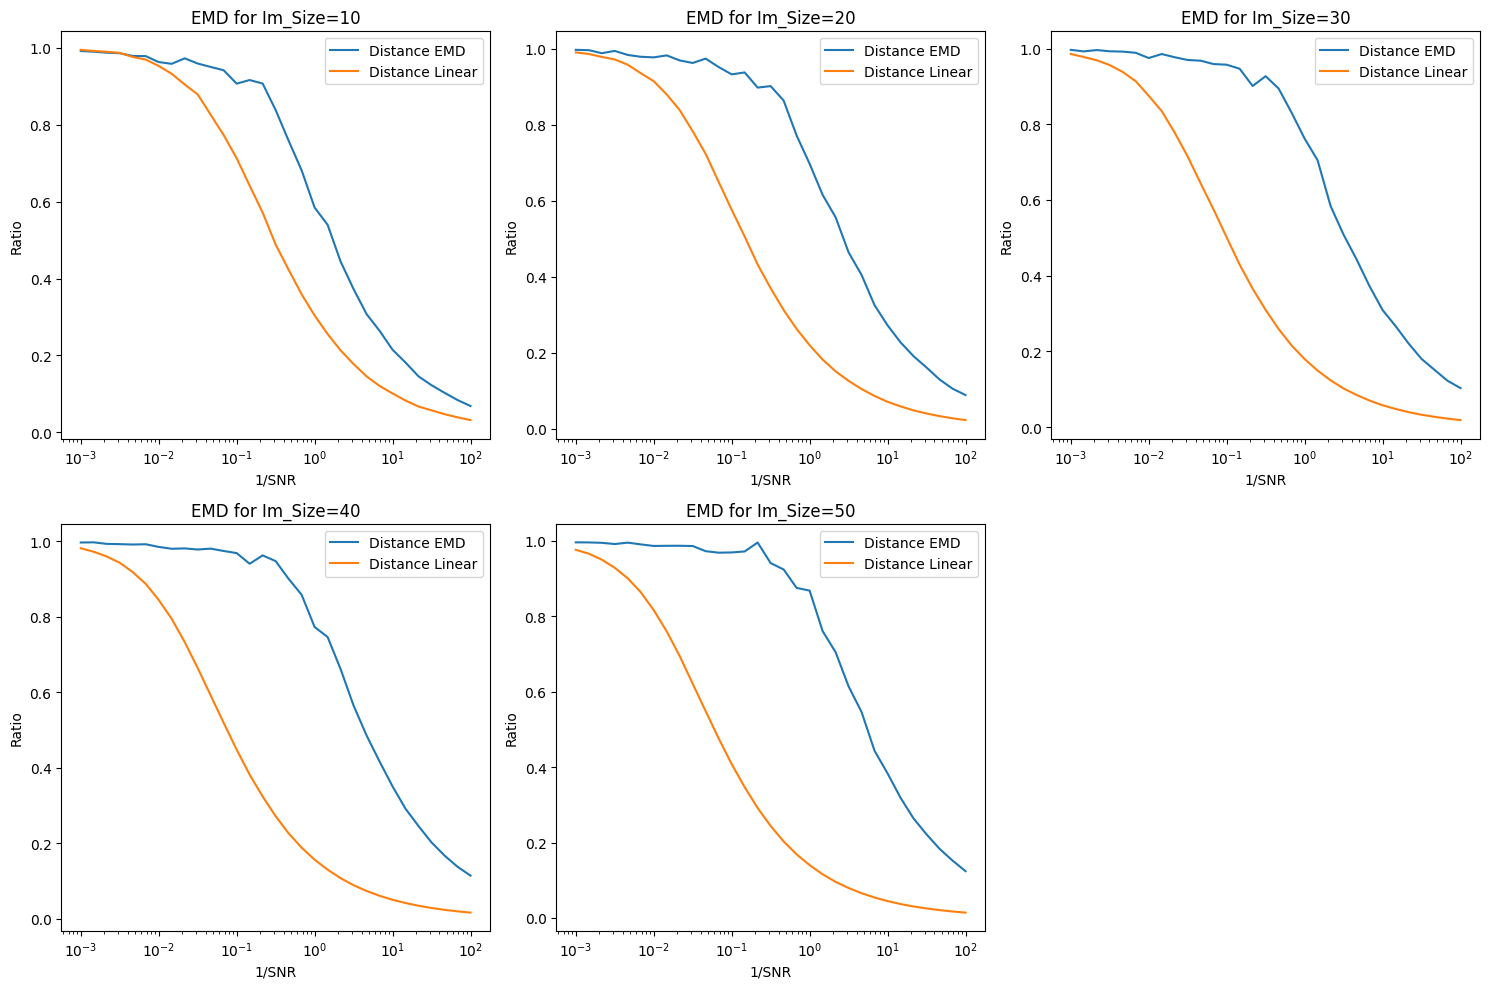

In [13]:
plt.figure(figsize=(15,10))

for i, im_size in enumerate(im_size_values):
    # Filter the dataframe based on current 'res' and 'scale' options
    filtered_df = df[(df['Im_Size'] == im_size)]
    plt.subplot(2, 3, i+1)
    plt.plot(1/filtered_df['SNR'], filtered_df['Ratios_EMD'], label='Distance EMD')
    plt.plot(1/filtered_df['SNR'], filtered_df['Ratios_Linear'], label='Distance Linear')
    plt.xscale('log')
    plt.title(f'EMD for Im_Size={im_size}')
    plt.xlabel('1/SNR')
    plt.ylabel('Ratio')
    plt.legend()

plt.tight_layout()
plt.show()

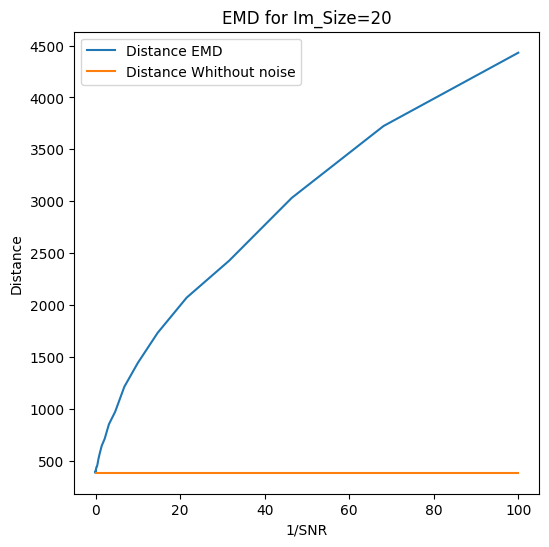

In [7]:
plt.figure(figsize=(6,6))
im_size = 20

# Filter the dataframe based on current 'res' and 'scale' options
filtered_df = df[(df['Im_Size'] == im_size)]
plt.plot(1/filtered_df['SNR'], filtered_df['Distances_Noised'], label='Distance EMD')
plt.plot(1/filtered_df['SNR'], filtered_df['Distances_Classic'], label='Distance Whithout noise')
# plt.plot(1/filtered_df['SNR'], 1000 * np.log(1/filtered_df['SNR']), label='SQRT')
# plt.xscale('log')
plt.title(f'EMD for Im_Size={im_size}')
plt.xlabel('1/SNR')
plt.ylabel('Distance')
plt.legend()

plt.show()

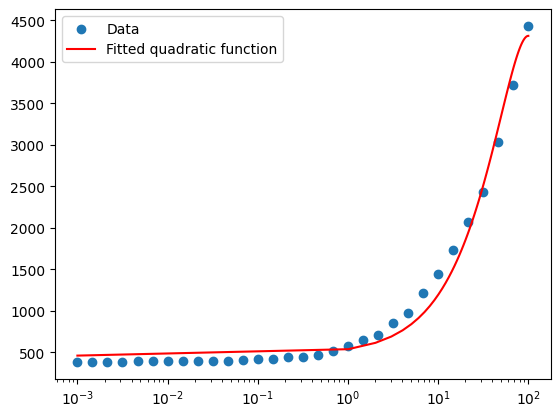

In [8]:
def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

# Replace x_data and y_data with your actual data points
x_data = 1 / filtered_df['SNR']
y_data = filtered_df['Distances_Noised']

# Use curve_fit to fit the quadratic function to the data
params, covariance = curve_fit(quadratic, x_data, y_data)

# Extract the best-fitting parameters
a, b, c = params

# Generate a sequence of x values for plotting the fit
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = quadratic(x_fit, a, b, c)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, color='red', label='Fitted quadratic function')
plt.legend()
plt.xscale('log')
plt.show()